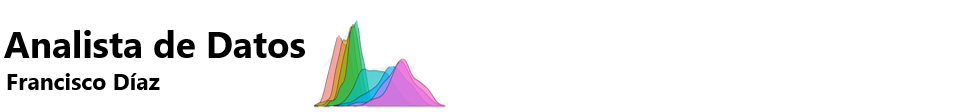

En este notebook se realizará la evaluación de un modelo de redes neuronales convolucionales previamente desarrollado. El enfoque principal será analizar el rendimiento del modelo cargado, denominado **modelo_hojas_cafe.h5**.

# **Librerias**

In [1]:
import kagglehub
import os
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
K.clear_session()

# **Preparación de los datos**

In [3]:
ruta = kagglehub.dataset_download("gauravduttakiit/coffee-leaf-diseases")
train_folder = os.path.join(ruta, 'train')
test_folder = os.path.join(ruta, 'test')

In [4]:
train_idg = ImageDataGenerator(rescale=1./255)
train_data = train_idg.flow_from_directory(
    train_folder,
        target_size=(224, 224),
            batch_size=32,
                class_mode='categorical'
                )
print(train_data)

Found 1264 images belonging to 4 classes.


In [5]:
test_idg = ImageDataGenerator(rescale=1./255)
test_data = test_idg.flow_from_directory(
    test_folder,
        target_size=(224, 224),
            batch_size=32,
                class_mode='categorical',
                  shuffle=False
                )
print(test_data)

Found 400 images belonging to 4 classes.


# **Evaluación del modelo**

**Cargamos el modelo**

In [6]:
modelo = tf.keras.models.load_model("/content/drive/MyDrive/modelo_hojas_cafe.h5")
modelo

<Sequential name=sequential, built=True>

**Los nombres de las categorias son:**

In [7]:
print(test_data.class_indices)

print(train_data.class_indices)

{'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}
{'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}


**El proceso de creación del modelo se resume en la siguiente tabla, la cual detalla las capas, sus dimensiones y parámetros correspondientes:**

In [8]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 224, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641,926 (17.71 MB)

 Trainable params: 4,641,924 (17.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Además, es posible representar la estructura de las capas mediante un diagrama.**

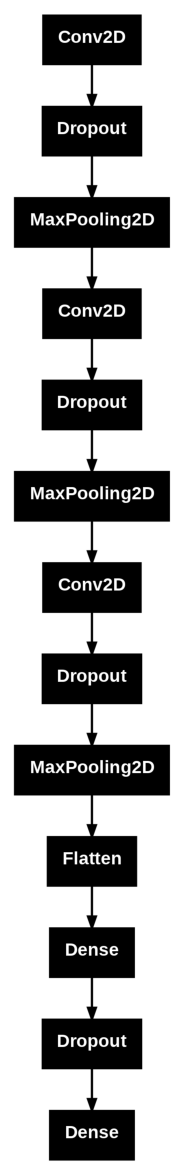

In [9]:
plot_model(modelo)

data = plt.imread('model.png')

plt.figure(figsize=(10, 15))
plt.axis('off')
plt.imshow(data)
plt.show()

**Matriz de confusion del modelo**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step


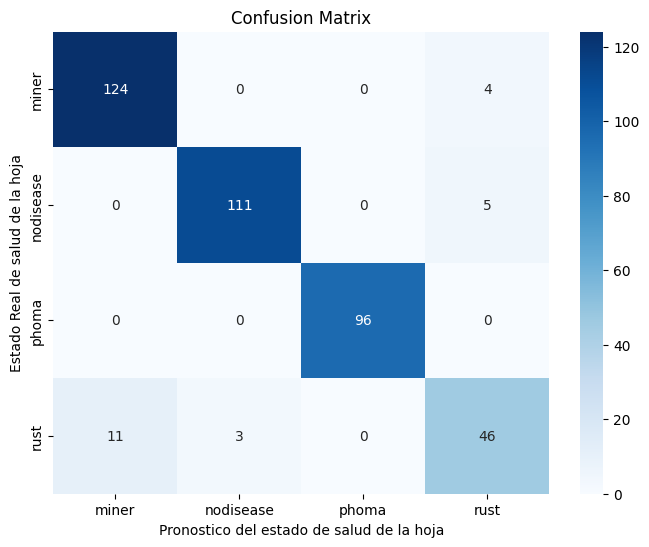

In [10]:
predictions = modelo.predict(test_data, batch_size=32)

true_labels = test_data.classes

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Pronostico del estado de salud de la hoja')
plt.ylabel('Estado Real de salud de la hoja')
plt.title('Confusion Matrix')
plt.show()

**Indicadores del rendimiento del modelo**

In [11]:
report = classification_report(true_labels, predicted_labels, target_names=test_data.class_indices.keys())
print(report)

              precision    recall  f1-score   support

       miner       0.92      0.97      0.94       128
   nodisease       0.97      0.96      0.97       116
       phoma       1.00      1.00      1.00        96
        rust       0.84      0.77      0.80        60

    accuracy                           0.94       400
   macro avg       0.93      0.92      0.93       400
weighted avg       0.94      0.94      0.94       400



# **Experimentación del modelo**

**Se usaron dos hojas cortadas manualmente para evaluar el desempeño del modelo.**

In [12]:
def predict_image_class(image_path, model, class_indices):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]

    return predicted_class_name

**Corremos el modelo para hacer las predicciones**

In [13]:
imagen_1 = "/content/drive/MyDrive/imagen02.jpg"
imagen_2 = "/content/drive/MyDrive/imagen01.jpg"

class_indices = {'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}

# Realiza las predicciones
prediction_1 = predict_image_class(imagen_1, modelo, class_indices)
prediction_2 = predict_image_class(imagen_2, modelo, class_indices)

# Imprime los resultados
print(f"Predicción para imagen_1: {prediction_1}")
print(f"Predicción para imagen_2: {prediction_2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicción para imagen_1: nodisease
Predicción para imagen_2: miner


**Observamos las imágenes con sus respectivas predicciones**

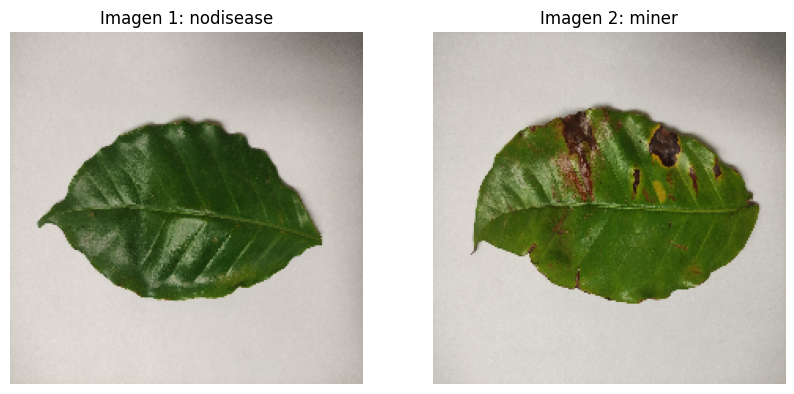

In [14]:
img1 = load_img(imagen_1, target_size=(224, 224))
img2 = load_img(imagen_2, target_size=(224, 224))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(f"Imagen 1: {prediction_1}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(f"Imagen 2: {prediction_2}")
plt.axis('off')

plt.show()